In [3]:
import pickle
from sklearn.inspection import permutation_importance

# Load model
with open(r"data\CartPole-v0\max_episode1\42\policy.pkl", "rb") as f:
    model = pickle.load(f)

In [4]:
import pandas as pd
import pickle
from sklearn.inspection import permutation_importance


# Load dataset
data = pd.read_csv(r"data\CartPole-v0\max_episode1\42\training_data.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Permutation importance (using full dataset here, or split into test set if you prefer)
result = permutation_importance(model.estimator, X, y, n_repeats=10, random_state=42)

# Create dataframe of importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "permutation_importance_mean": result.importances_mean,
    "permutation_importance_std": result.importances_std
}).sort_values(by="permutation_importance_mean", ascending=False)

print(importance_df)


# Access the underlying RandomForestClassifier
rf_model = model.estimator

# Built-in feature importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "built-in_importance": rf_model.feature_importances_
}).sort_values(by="built-in_importance", ascending=False)

print(importance_df)

e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

           feature  permutation_importance_mean  permutation_importance_std
2          state_2                     0.016403                    0.004449
4   desired_return                     0.003762                    0.003465
5  desired_horizon                     0.003160                    0.004320
1          state_1                     0.000301                    0.006031
3          state_3                    -0.001204                    0.006740
0          state_0                    -0.007675                    0.006212
           feature  built-in_importance
2          state_2             0.205053
0          state_0             0.177965
1          state_1             0.171964
3          state_3             0.170145
5  desired_horizon             0.142540
4   desired_return             0.132332


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

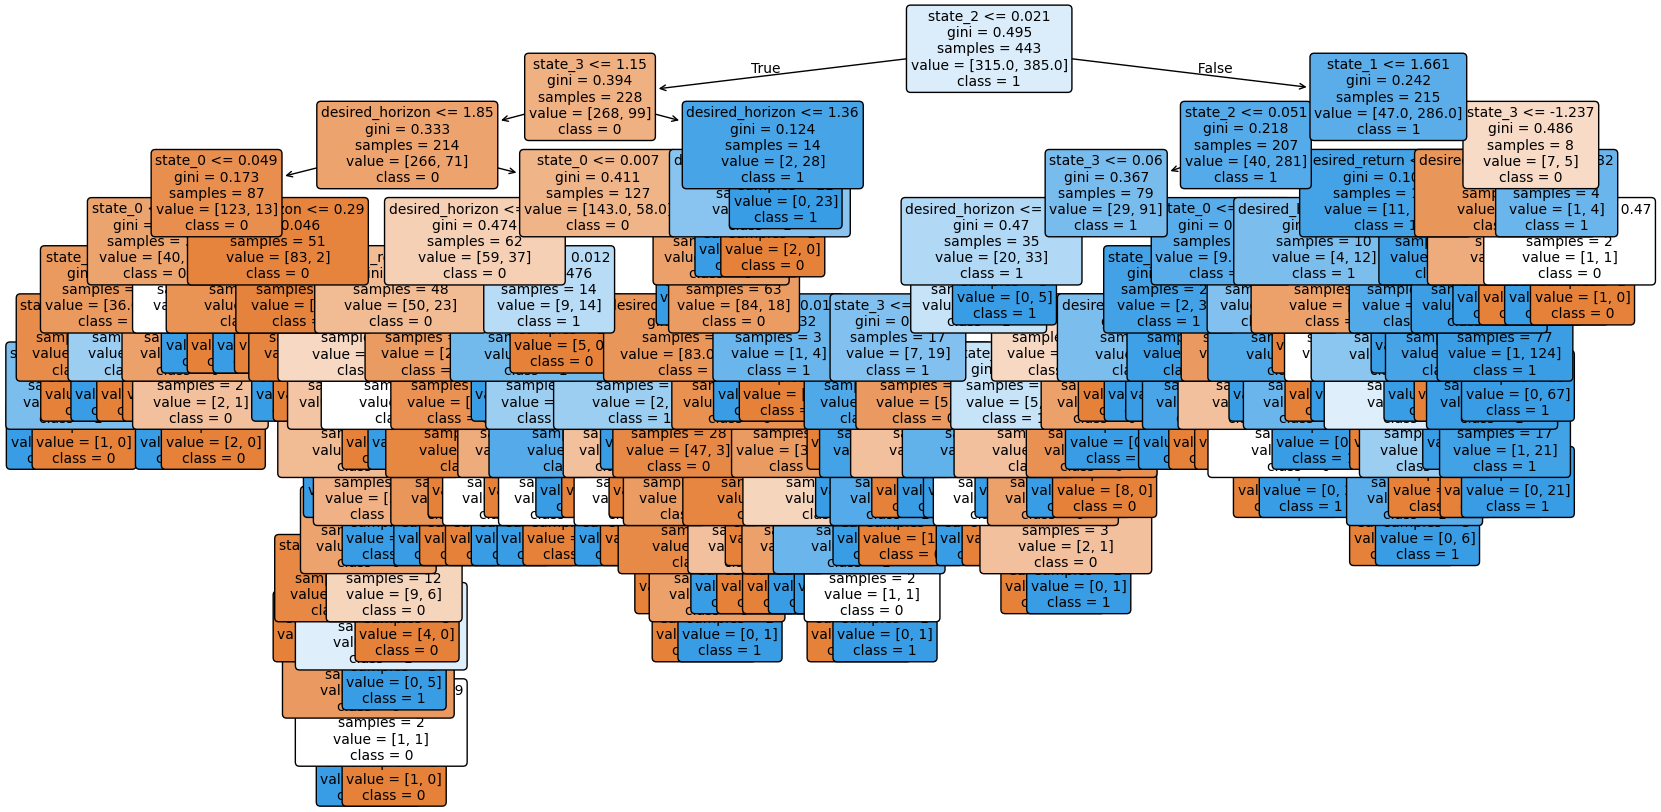

In [8]:
import pickle
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

# Load your policy (RandomForest wrapped inside SklearnPolicy)
with open(r"resources/CartPole-v0/RandomForest/policy.pkl", "rb") as f:
    policy = pickle.load(f)

# Access the underlying RandomForestClassifier
rf_model = policy.estimator

# Load dataset (for feature names)
data = pd.read_csv(r"data\CartPole-v0\estimator_nameensemble.GradientBoostingClassifier_max_episode5\42\training_data.csv")
X = data.iloc[:, :-1]

# Pick one tree from the forest (e.g., the first)
estimator = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    estimator, 
    feature_names=X.columns, 
    class_names=[str(c) for c in rf_model.classes_], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

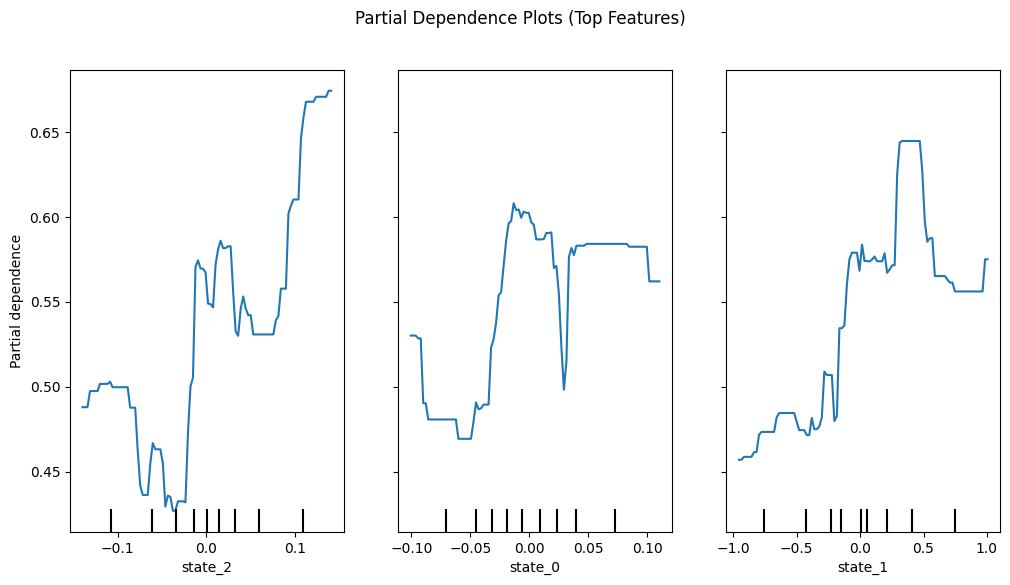

In [9]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Load your policy (RandomForest wrapped inside SklearnPolicy)
with open(r"data\CartPole-v0\estimator_nameensemble.GradientBoostingClassifier_max_episode5\42\policy.pkl", "rb") as f:
    policy = pickle.load(f)

# Access the underlying RandomForestClassifier
rf_model = policy.estimator


# Access the fitted RandomForestClassifier
rf_model = model.estimator  # as you already did

# Pick top features from permutation importance
top_features = importance_df["feature"].head(3).tolist()  # top 3 for example

# Plot PDPs
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X,
    features=top_features,
    target=1,  # for multiclass classification, specify the class index (0, 1, 2...)
    ax=ax
)
plt.suptitle("Partial Dependence Plots (Top Features)")
plt.show()


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

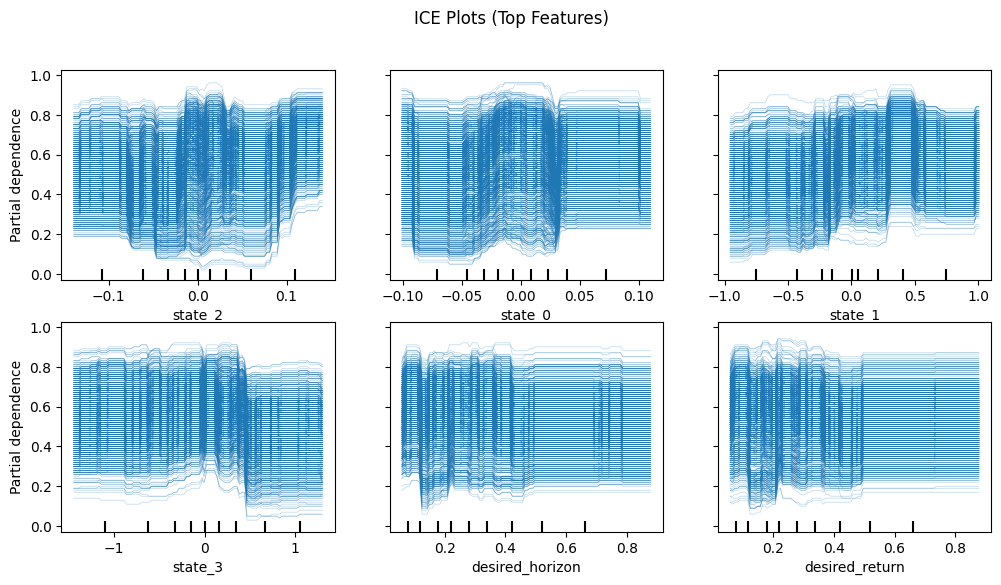

In [10]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming you already have rf_model and X

# Top features (same as PDP)
top_features = importance_df["feature"].head(6).tolist()

# Plot ICE plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    rf_model,
    X,
    features=top_features,
    target=0,  # class index
    kind="individual",  # <-- ICE instead of PDP
    ax=ax
)
plt.suptitle("ICE Plots (Top Features)")
plt.show()


In [18]:
import pickle
from sklearn.inspection import permutation_importance

# Load model
with open(r"data\CartPole-v0\base\42\policy.pkl", "rb") as f:
    model = pickle.load(f)

In [19]:
import pandas as pd
import pickle
from sklearn.inspection import permutation_importance


# Load dataset
data = pd.read_csv(r"data\CartPole-v0\base\42\testing_data.csv")
X = data.iloc[:, :-3]
y = data.iloc[:, -1]

X = X.rename(
    columns={
        "state_0": "x",      # cart position
        "state_1": "x_dot",  # cart velocity
        "state_2": "θ",      # pole angle
        "state_3": "θ_dot",   # pole angular velocity
        "desired_horizon": "dh",
        "desired_return": "dr"
    }
)


# Permutation importance (using full dataset here, or split into test set if you prefer)
result = permutation_importance(model.estimator, X, y, n_repeats=10, random_state=42)

# Create dataframe of importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "permutation_importance_mean": result.importances_mean,
    "permutation_importance_std": result.importances_std
}).sort_values(by="permutation_importance_mean", ascending=False)

print(importance_df)



e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

  feature  permutation_importance_mean  permutation_importance_std
3   θ_dot                     0.460338                    0.002778
2       θ                     0.117588                    0.002245
1   x_dot                     0.074691                    0.002058
0       x                     0.066173                    0.001375
4      dr                     0.032052                    0.000781
5      dh                     0.001083                    0.000157


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [20]:

# Access the underlying RandomForestClassifier
rf_model = model.estimator

# Built-in feature importances
importance_df = pd.DataFrame({
    "feature": X.columns,
    "built-in_importance": rf_model.feature_importances_
}).sort_values(by="built-in_importance", ascending=False)

print(importance_df)

  feature  built-in_importance
3   θ_dot             0.519593
2       θ             0.134747
1   x_dot             0.114528
0       x             0.078775
5      dh             0.077202
4      dr             0.075154


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

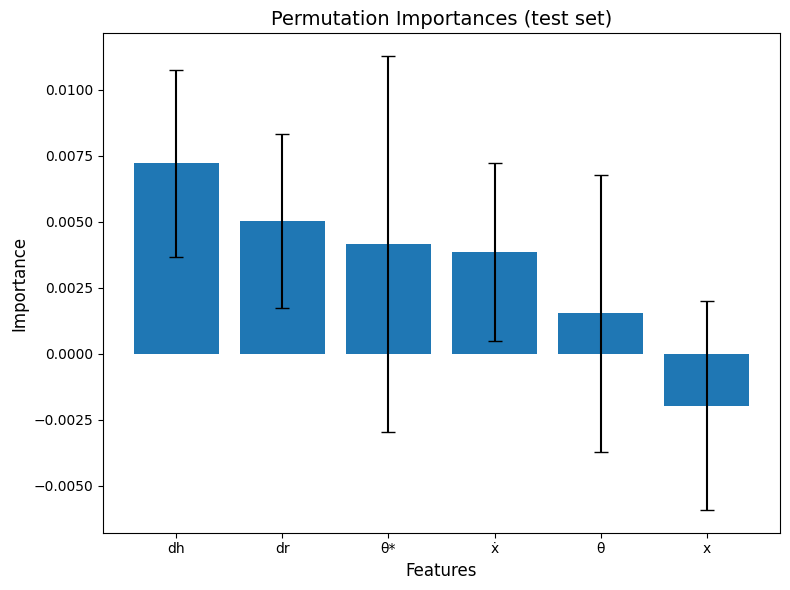

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.inspection import permutation_importance

# Load dataset
data = pd.read_csv(r"data/CartPole-v0/max_episode4/42/testing_data.csv")
X = data.iloc[:, :-3]
y = data.iloc[:, -1]

# Rename with symbols
X = X.rename(
    columns={
        "state_0": "x",       # cart position
        "state_1": "ẋ",      # cart velocity
        "state_2": "θ",       # pole angle
        "state_3": "θ*" ,      # pole angular velocity
        "desired_horizon": "dh",
        "desired_return": "dr"
    }
)

# Compute permutation importance
result = permutation_importance(
    model.estimator, X, y, n_repeats=10, random_state=42
)

# Sort by importance
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_features = X.columns[sorted_idx]
sorted_means = result.importances_mean[sorted_idx]
sorted_stds = result.importances_std[sorted_idx]

# Plot vertical bars with error bars
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, sorted_means, yerr=sorted_stds, capsize=5)
plt.title("Permutation Importances (test set)", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

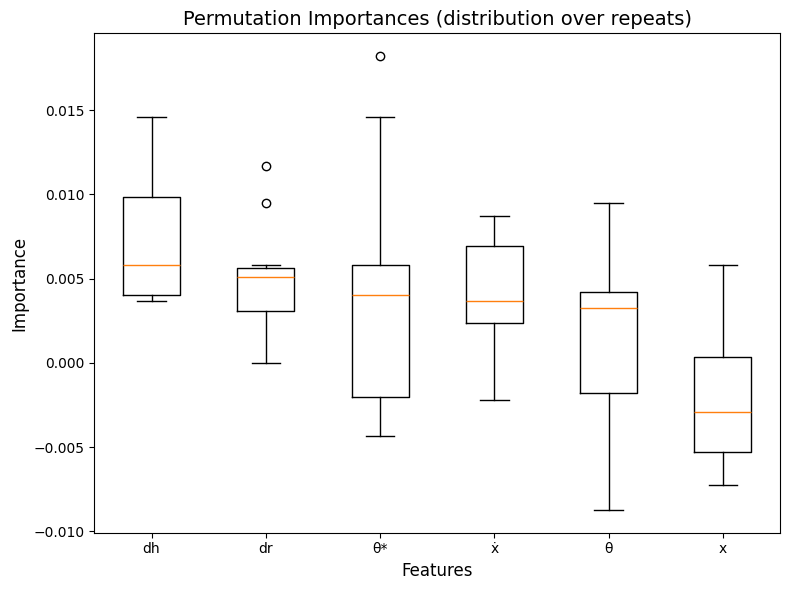

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Load dataset
data = pd.read_csv(r"data/CartPole-v0/max_episode4/42/testing_data.csv")
X = data.iloc[:, :-3]
y = data.iloc[:, -1]

# Rename with symbols
X = X.rename(
    columns={
        "state_0": "x",       # cart position
        "state_1": "ẋ",      # cart velocity
        "state_2": "θ",       # pole angle
        "state_3": "θ*",      # pole angular velocity
        "desired_horizon": "dh",
        "desired_return": "dr"
    }
)

# Compute permutation importance
result = permutation_importance(
    model.estimator, X, y, n_repeats=10, random_state=42
)

# Sort features
sorted_idx = result.importances_mean.argsort()[::-1]
sorted_features = X.columns[sorted_idx]

# Boxplot (vertical)
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert=True,
    labels=sorted_features
)
ax.set_title("Permutation Importances (distribution over repeats)", fontsize=14)
ax.set_xlabel("Features", fontsize=12)
ax.set_ylabel("Importance", fontsize=12)
plt.tight_layout()
plt.show()


e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
e:\liege\upside_down_rl\venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but

  feature  MDI_importance  perm_importance_mean  perm_importance_std
0      θ*        0.519593              0.004151             0.007129
1       θ        0.134747              0.001529             0.005236
2      ẋ        0.114528              0.003860             0.003370
3       x        0.078775             -0.001966             0.003950
4      dh        0.077202              0.007210             0.003545
5      dr        0.075154              0.005025             0.003297


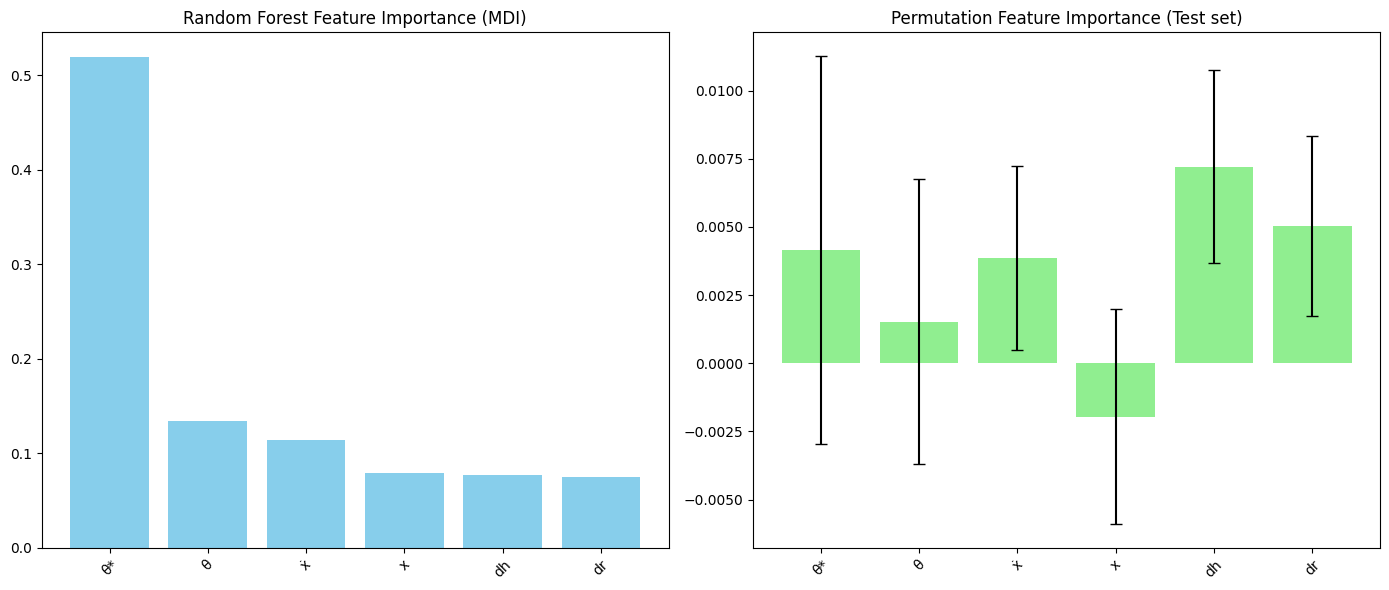

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Assume X, y already loaded and renamed
rf_model = model.estimator  # RandomForestClassifier

# --- Built-in MDI importances ---
mdi_importances = rf_model.feature_importances_
mdi_df = pd.DataFrame({
    "feature": X.columns,
    "MDI_importance": mdi_importances
}).sort_values(by="MDI_importance", ascending=False)

# --- Permutation importances ---
perm_result = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)
perm_df = pd.DataFrame({
    "feature": X.columns,
    "perm_importance_mean": perm_result.importances_mean,
    "perm_importance_std": perm_result.importances_std
}).sort_values(by="perm_importance_mean", ascending=False)

# --- Comparison Table ---
comparison_df = mdi_df.merge(perm_df, on="feature")
print(comparison_df)

# --- Visualization ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Built-in importance
axes[0].bar(comparison_df["feature"], comparison_df["MDI_importance"], color="skyblue")
axes[0].set_title("Random Forest Feature Importance (MDI)")
axes[0].tick_params(axis="x", rotation=45)

# Right: Permutation importance with error bars
axes[1].bar(
    comparison_df["feature"],
    comparison_df["perm_importance_mean"],
    yerr=comparison_df["perm_importance_std"],
    capsize=4,
    color="lightgreen"
)
axes[1].set_title("Permutation Feature Importance (Test set)")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


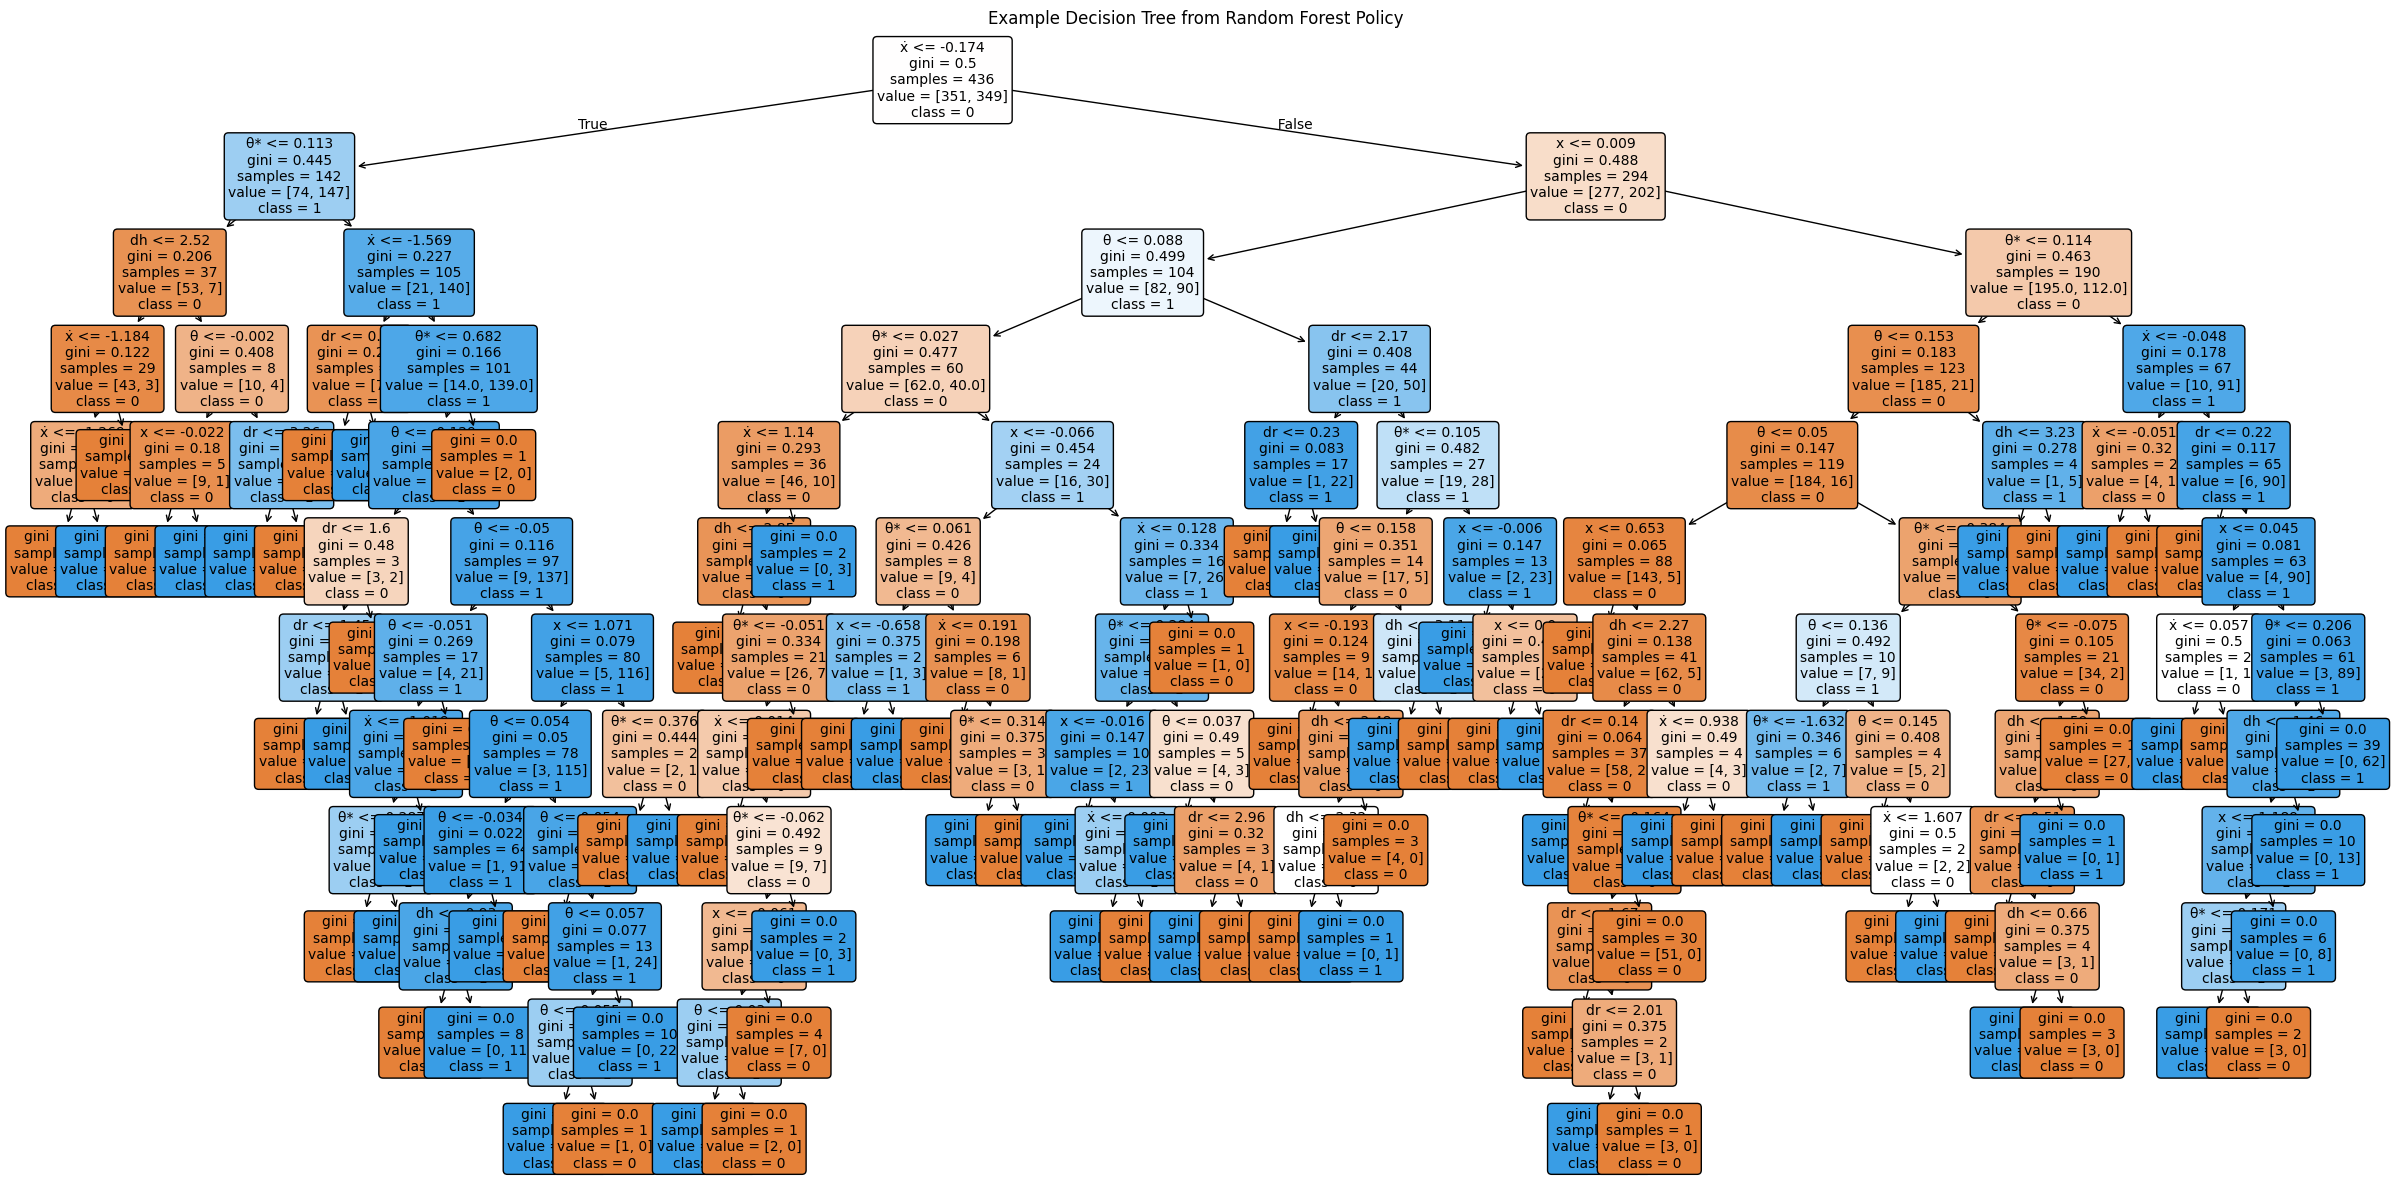

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree from the RandomForest
one_tree = rf_model.estimators_[2]  # first decision tree

plt.figure(figsize=(30, 15))
plot_tree(
    one_tree,
    feature_names=X.columns,
    class_names=[str(c) for c in rf_model.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Example Decision Tree from Random Forest Policy")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import warnings

# ==============================================================================
# USER-DEFINED PARAMETERS - EDIT THESE
# ==============================================================================
# Replace with the path to your testing data file
csv_filepath = r'data\CartPole-v0\base\42\testing_data.csv'
# The specific simulation number to analyze (from 0 to 99)
simulation_number_to_analyze = 0

# ==============================================================================
# SCRIPT LOGIC - DO NOT MODIFY BELOW THIS LINE
# ==============================================================================
warnings.filterwarnings('ignore', category=UserWarning)

try:
    # Load the dataset
    df = pd.read_csv(csv_filepath)
except FileNotFoundError:
    print(f"Error: The file '{csv_filepath}' was not found. Please check the path and filename.")
    exit()

# Filter for the specified simulation number
sim_df = df[df['simulation_number'] == simulation_number_to_analyze].copy()

if sim_df.empty:
    print(f"Error: No data found for simulation number {simulation_number_to_analyze}. "
          "Please check if this simulation number exists.")
    exit()

if len(sim_df) < 15:
    print(f"Warning: Simulation {simulation_number_to_analyze} is too short ({len(sim_df)} rows) "
          "to analyze in three segments. Skipping analysis.")
    exit()

# Define features and target based on the columns
features = [col for col in sim_df.columns if col.startswith('state_') or col in ['desired_return', 'desired_horizon']]
target = 'action'

# Define the segments (first 5, middle 5, last 5)
total_entries = len(sim_df)
segments = {
    'Early Simulation': sim_df.iloc[:5],
    'Mid-Simulation': sim_df.iloc[total_entries // 2 - 2: total_entries // 2 + 3],
    'End Simulation': sim_df.iloc[-5:]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle(f'Permutation Importance Across Simulation #{simulation_number_to_analyze}', fontsize=16)

for ax, (title, segment_df) in zip(axes, segments.items()):
    if segment_df.empty:
        continue

    X_segment = segment_df[features]
    y_segment = segment_df[target]
    
    # Train a new simple RandomForestClassifier for each segment
    model = RandomForestClassifier(n_estimators=5, random_state=42)
    model.fit(X_segment, y_segment)
    
    # Calculate permutation importance on the segment's data
    result = permutation_importance(model, X_segment, y_segment, n_repeats=10, random_state=42)
    
    # Sort features by importance and plot
    sorted_idx = result.importances_mean.argsort()
    
    ax.barh(X_segment.columns[sorted_idx], result.importances_mean[sorted_idx], 
            xerr=result.importances_std[sorted_idx], color='lightgreen')
    
    ax.set_title(title)
    ax.set_xlabel('Mean Accuracy Decrease')
    ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()